<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/pima-indians-diabetes/6_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 랜덤포레스트
  앙상블방법중 배깅방법을 사용     
  전체 데이터를 샘플링 한 뒤 다수의 트리를 그린다. 
  

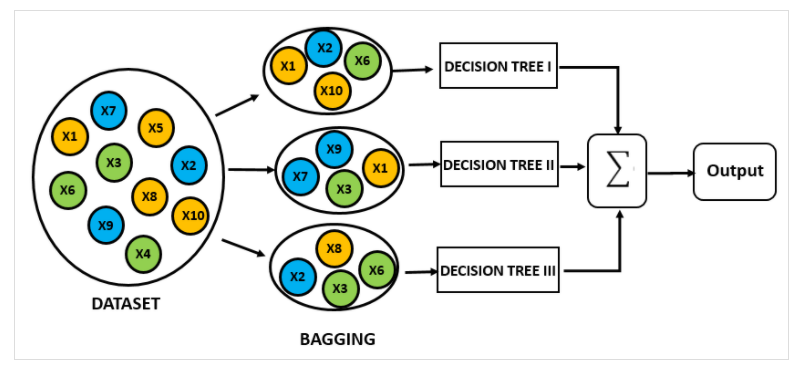

랜덤 포레스트는 제일 먼저 bagging 이라는 과정을 거칩니다.     
Bagging은 트리를 만들 때 training set의 부분집합을 활용하여 형성하는 것을 말합니다.     
예를 들어, training set에 1000 개의 데이터가 존재한다고 가정하면      
각 트리를 생성할 때 100 개의 데이터만 임의로 선택하여 트리를 만드는데 활용할 수 있는 것입니다.      
중요한 것은 바로 중복을 허용한다는 것

feature를 선택하는데 있어서도 변화를 줍니다. Feature를 선택할때도 기존에 존재하는 feature의 부분집합을 활용합니다.

## 데이터 로드와 split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sklearn/diabetes_feature.csv')
df.shape

(768, 16)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [ ]:
x = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan','low_glu_insulin']]
x.shape

(768, 9)

In [ ]:
y = df['Outcome']
y.shape

(768,)

sklearn에서 제공하는 model_selection의 train_test_split으로 테스트와 학습 나누어 보겠다

In [ ]:
# random 하게 세트들을 가져온다
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,169.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False
...,...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0,False
106,96,122,0,22.4,0.207,27,False,102.5,True
270,101,86,37,45.6,1.136,38,True,169.5,False
435,141,0,0,42.4,0.205,29,False,169.5,False


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 9), (614,), (154, 9), (154,))

## 학습과 예측

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_predict = model.predict(X_test)

## 정확도 측정

In [ ]:
# DecisionTree 사용했을 때는 28
# randomForest사용하니 20개로 줄었다

different_count = (y_predict != y_test).sum()
different_count

20

In [ ]:
(len(y_test)-different_count)/len(y_test) * 100

87.01298701298701

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.8701298701298701

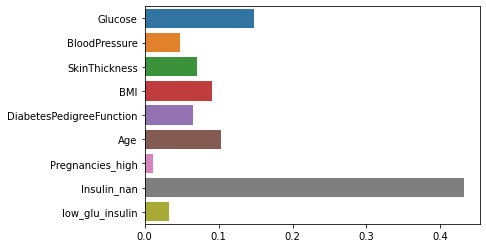

In [ ]:
feature_names = X_train.columns.to_list()

import seaborn as sns
sns.barplot(x = model.feature_importances_, y=feature_names)

랜덤포레스트는 시각화 할 수 없다.    
위의 코드는 n_estimators가 기본값인 100 인데 100개의 tree를 시각화 할 수 없기 때문이다